# 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
The creditcard.csv dataset contains details of 284,807 transactions out of which 492 are fraudulent transactions.

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

* Data has 31 features from V1-V28 & Time, Amount and Class

* Input features: V1-V28, Time and Amount

* Target variable: Class

In [ ]:
# Load dataset
df = pd.read_csv('/content/sample_data/creditcard.csv')

Display the top 15 rows of the dataframe

In [ ]:
# Display first few rows
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# 3. Split data into train and test sets
Split the data into training and test sets using the train_test_split function. Specify X as the input features, y as the target variable, set test_size to 0.2 for an 80/20 split, and use random_state for reproducibility.

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train shape: (227845,)
y_test shape: (56962,)


# 4. Dealing with Imbalanced data
How SMOTE Works

* Identify Minority Class: SMOTE identifies the instances in the minority class. Choose Neighbors: For each instance in the minority class, it selects a number of its nearest neighbors (typically using Euclidean distance).
* Generate Synthetic Samples: New samples are created by interpolating between the instance and its neighbors.

In [ ]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

X_resampled shape: (454902, 30)
y_resampled shape: (454902,)


# 5. Scaling
Scaling is a crucial preprocessing step in machine learning and data analysis.It helps improve model performance, ensures features contribute equally and helps us achieve more reliable and interpretable models.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# 6. Train the Model
Train the model and predict the metrics.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the Random Forest Classifier
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_resampled_scaled, y_resampled)

LogisticRegression(class_weight='balanced')

In [ ]:
# Make predictions on the resampled training set
y_train_pred = lr_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = lr_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    227451
           1       0.99      0.97      0.98    227451

    accuracy                           0.98    454902
   macro avg       0.98      0.98      0.98    454902
weighted avg       0.98      0.98      0.98    454902

Training Confusion Matrix:
 [[225572   1879]
 [  7481 219970]]
Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.92      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.96      0.64     56962
weighted avg       1.00      0.99      0.99     56962

Testing Confusion Matrix:
 [[56400   464]
 [    8    90]]


In [ ]:
from sklearn.metrics import  precision_score, recall_score

# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred)
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred)
print("Training Recall Score : ", train_recall)

Training Accuracy :  0.9794241397048156
Training Precision :  0.9915302750970254
Training Recall Score :  0.9671093993871207


In [ ]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9917137740950107
Testing Precision :  0.1624548736462094
Testing Recall Score :  0.9183673469387755


Here, we can see, the model is **NOT performing well** on unseen data. Though, we are getting testing accuracy as 99%, but “high accuracy can be misleading in such cases with imbalanced data. It’s often advisable to consider additional metrics such as: Precision, Recall, F1 – Score and ROC value”.

In order to enhance our model performance, we will perform Threshold Tuning.

# 7. Threshold Adjustment
Adjusting the threshold can help improve the model's ability to identify the minority class without overly compromising the performance on the majority class and help enhance the performance of the model.

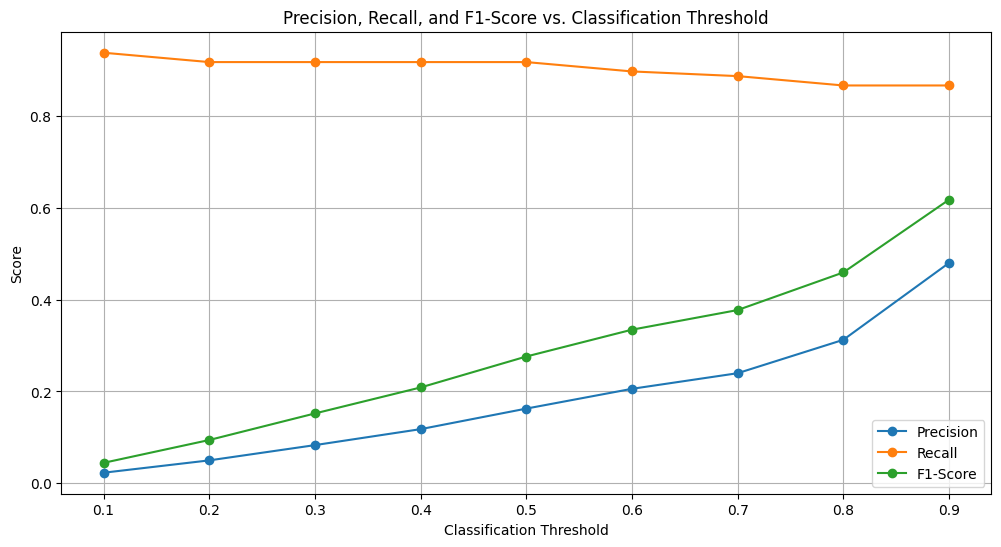

Best threshold based on F1-score: 0.9
Final Testing Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.48      0.87      0.62        98

    accuracy                           1.00     56962
   macro avg       0.74      0.93      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Calculate probability
y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 1.0, 0.1)
results = []

for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)

    # Evaluate the model
    report = classification_report(y_test, y_pred_adjusted, output_dict=True)
    results.append({
        'threshold': threshold,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score']
    })

# Convert results to DataFrame for easier analysis
import pandas as pd

results_df = pd.DataFrame(results)

# Plot the metrics against thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision', marker='o')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall', marker='o')
plt.plot(results_df['threshold'], results_df['f1-score'], label='F1-Score', marker='o')
plt.title('Precision, Recall, and F1-Score vs. Classification Threshold')
plt.xlabel('Classification Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Choose the best threshold based on your preference for precision or recall
best_threshold = results_df.loc[results_df['f1-score'].idxmax(), 'threshold']
print(f"Best threshold based on F1-score: {best_threshold}")

# Make final predictions using the best threshold
y_test_pred_final = (y_probs >= best_threshold).astype(int)
print("Final Testing Classification Report:\n", classification_report(y_test, y_test_pred_final))

The performace has significantly increased.

Print the test metrics after performing Threshold adjustment

In [ ]:
# After threshold adjustment

# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_final)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred_final)
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred_final)
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.998156665847407
Testing Precision :  0.480225988700565
Testing Recall Score :  0.8673469387755102


### Precision - Recall Curve
Plot the Precision - Recall Curve to check if model is able to distinguishing between the positive and negative classes or not.

ROC AUC Score: 0.9806449222204356


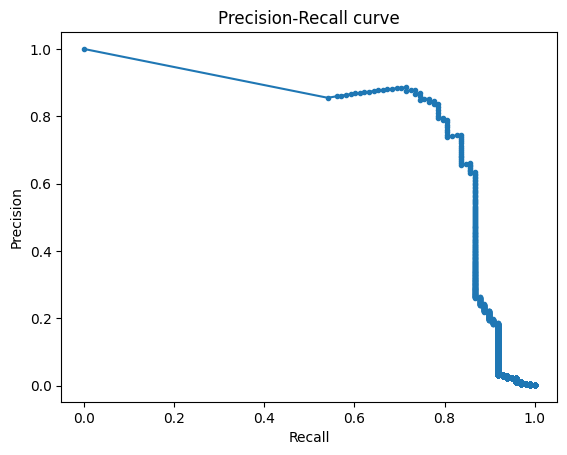

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

# Get probabilities for the positive class
y_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**ROC AUC Score: 0.9806449222204356** --- Model is excellent at distinguishing between the positive and negative classes

### ROC Curve

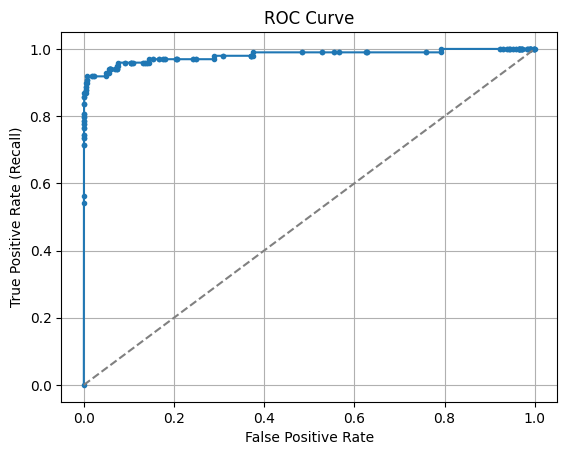

In [ ]:
from sklearn.metrics import roc_curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.show()

### Confusion Matrix
Confusion Matrix is a machine learning tool to evaluate the performance of a classification model.

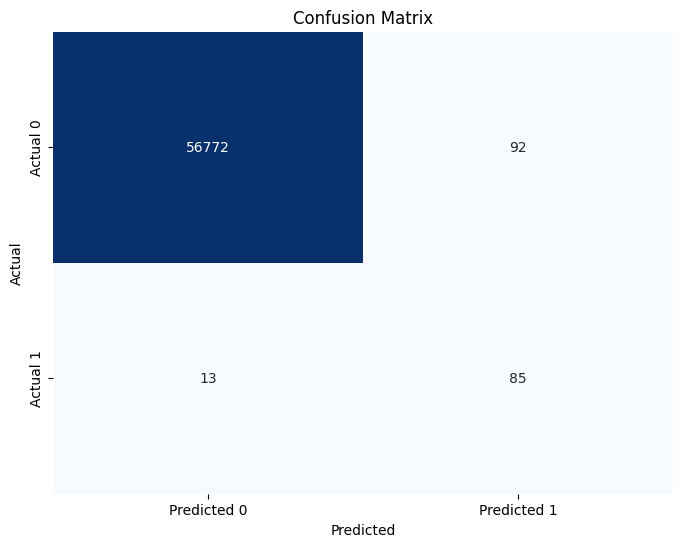

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* True Negatives (56772): The model correctly predicted the negative class.
* False Positives (92): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (13): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (85): The model correctly predicted the positive class.

This logistic Regression model is **not performing well** for Fraud Detection case as the number of False Positives cases (92) are more than True Positives (85). This indicates that the model is predicting more instances as positive when they are actually negative, compared to correctly identifying positive instances.


# 8. Feature Selection
Feature selection is one of the major processes in machine learning. In this process, a subset of relevant features or variables, also known as predictors for model construction, needs to be found.

Feature Importances:
    Feature  Importance  Absolute Importance
17     V17  -10.241140            10.241140
14     V14   -9.510166             9.510166
12     V12   -7.842542             7.842542
10     V10   -6.250075             6.250075
1       V1    4.566205             4.566205
16     V16   -3.645494             3.645494
8       V8   -3.627613             3.627613
4       V4    3.181090             3.181090
11     V11    2.146686             2.146686
5       V5    2.052954             2.052954
7       V7   -1.679306             1.679306
9       V9   -1.654866             1.654866
3       V3    1.422181             1.422181
18     V18   -1.325315             1.325315
29  Amount    0.746202             0.746202
2       V2   -0.683765             0.683765
6       V6   -0.653860             0.653860
22     V22    0.627973             0.627973
21     V21    0.613491             0.613491
27     V27    0.608696             0.608696
19     V19    0.516552             0.516552
28     V28

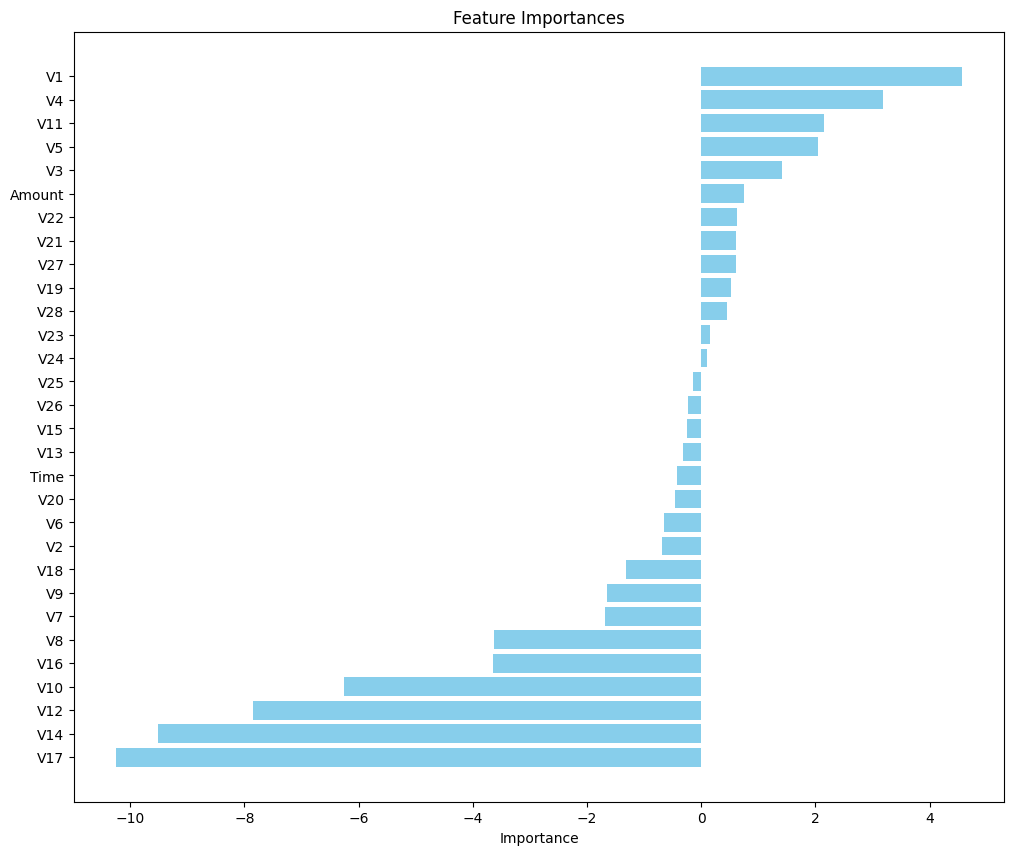

In [ ]:
# Feature selection based on feature importances
importance = lr_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to view feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df['Absolute Importance'] = importance_df['Importance'].abs()
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# Print feature importances
print("Feature Importances:\n", importance_df)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_features = importance_df.head(5)
print("Top 5 Features:\n", top_features)

# Plotting feature importances
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

# 9. Hyperparameter Tuning
Perform Hyperparameter Tuning on threshold adjusted data to check the performance of the model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Set up the hyperparameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20)
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_lr_model = grid_search.best_estimator_

# Predictions
y_probs_best = best_lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_best = (y_probs_best >= best_threshold).astype(int)

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred_best))

# Calculate ROC AUC for the best model
roc_auc_best = roc_auc_score(y_test, y_probs_best)
print(f"Best Model ROC AUC Score: {roc_auc_best}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 4.281332398719396}

Classification Report for the Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.49      0.87      0.63        98

    accuracy                           1.00     56962
   macro avg       0.75      0.93      0.81     56962
weighted avg       1.00      1.00      1.00     56962

Best Model ROC AUC Score: 0.9815764322752174


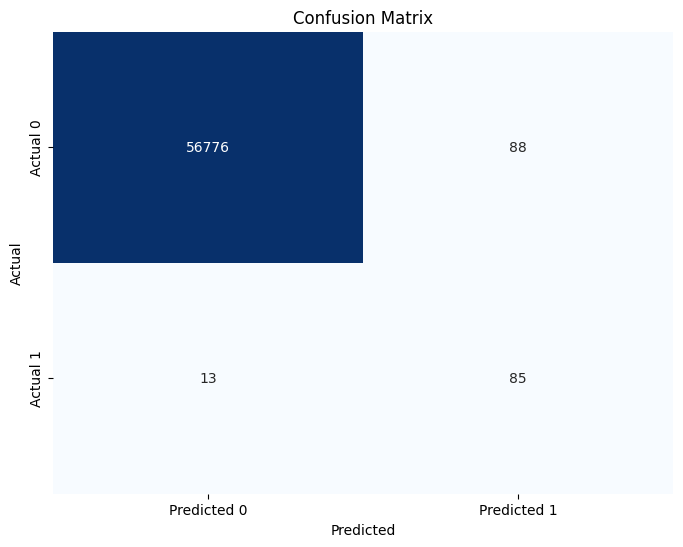

In [ ]:
# Confusion Matrix after hyperparameter tuning
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Slightly better!!!

* True Negatives (56776): The model correctly predicted the negative class.
* False Positives (88): The model incorrectly predicted the positive class when it was actually negative.
* False Negatives (13): The model incorrectly predicted the negative class when it was actually positive.
* True Positives (85): The model correctly predicted the positive class.

This logistic Regression model is **not performing well** for Fraud Detection case as the number of False Positives cases (88) are more than True Positives (85). This indicates that the model is predicting more instances as positive when they are actually negative, compared to correctly identifying positive instances.


# 10. Download Pickle file

In [ ]:
from google.colab import files

# Save your model as a pickle file
import pickle

filename = 'LogisticRegression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lr_model, file)

# Download the pickle file
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>